In [1]:
import pandas as pd
import numpy as np

### Loading the dataset that we created

In [44]:
df_pls=pd.read_excel("df_merge_n.xlsx")
df_pls_pls=df_pls.drop(columns=['Unnamed: 0'])
df_pls_pls=df_pls_pls.fillna(0)
df_pls_new=df_pls_pls.drop(columns=['commission_code','number_of_cite'])
df_pls_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 47 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   region                                                                                                                    1583 non-null   object 
 1   city_or_district_within_the_region                                                                                        1583 non-null   object 
 2   area_in_the_city                                                                                                          1583 non-null   object 
 3   settlement                                                                                                                1583 non-nu

In [45]:
df_merge1=df_pls_new.drop(columns=['attachment1','attachment2','attachment3','attachment4','attachment5','comment','id','type','name','location','origin','area'])

In [46]:
df_merge1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 35 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   region                                                                                                                    1583 non-null   object 
 1   city_or_district_within_the_region                                                                                        1583 non-null   object 
 2   area_in_the_city                                                                                                          1583 non-null   object 
 3   settlement                                                                                                                1583 non-nu

### Creating the Lukashenko share of votes variable

In [47]:
df_merge1['lukashenko_share']=df_merge1['Lukashenko']/df_merge1['number_of_voters_who_took_part_in_the_voting']

In [48]:
df_merge1['lukashenko_share']=df_merge1['lukashenko_share'].replace([np.inf, -np.inf], 0)

In [49]:
df_merge1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 36 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   region                                                                                                                    1583 non-null   object 
 1   city_or_district_within_the_region                                                                                        1583 non-null   object 
 2   area_in_the_city                                                                                                          1583 non-null   object 
 3   settlement                                                                                                                1583 non-nu

In [50]:
df_merge2=df_merge1.drop(columns=['parent_id','description_x','commission_id','work_title','description_y','city_or_district_within_the_region','area_in_the_city','settlement'])

In [51]:
df_merge2.columns

Index(['region',
       'total_number_of_voters_at_the_polling_station_determined_by_the_list_of_citizens_entitled_to_participate_in_the_election',
       'number_of_voters_who_received_ballots',
       'number_of_voters_who_took_part_in_the_voting',
       'number_of_voters_who_took_part_in_the_early_voting',
       'number_of_voters_who_took_part_in_voting_at_the_place_of_residence',
       'number_of_voters_who_took_part_in_the_voting_on_election_day_at_the_polling_station',
       'Dmitriev', 'Kanopatskaya', 'Lukashenko', 'Tikhanovskaya', 'Cherechen',
       'number_of_votes_for_candidates_who_dropped_out_during_early_voting_period',
       'number_of_votes_againts_all_candidates',
       'number_of_votes_against_a_candidate_if_voting_was_held_on_one_candidate',
       'number_of_ballots_declared_invalid',
       'number_of_ballots_received_by_election_commission',
       'number_of_spoiled_ballots', 'number_of_unused_ballots', 'latitude',
       'longitude', 'doctor', 'army', 'edu

### Renaming the cell values with their English translation

In [54]:
df_merge2['region'].unique()

array(['brestskaya', 'no_region', 'vitebskaya', 'gomelskaya',
       'grodnenskaya', 'miskaya', 'mogilevskaya', 'minsk'], dtype=object)

In [53]:
df_merge2['region']=df_merge2['region'].replace('Брестская','brestskaya')
df_merge2['region']=df_merge2['region'].replace('Витебская','vitebskaya')
df_merge2['region']=df_merge2['region'].replace('Гомельская','gomelskaya')
df_merge2['region']=df_merge2['region'].replace('Гродненская','grodnenskaya')
df_merge2['region']=df_merge2['region'].replace('Минская','miskaya')
df_merge2['region']=df_merge2['region'].replace('Могилевская','mogilevskaya')
df_merge2['region']=df_merge2['region'].replace('город Минск','minsk')
df_merge2.region=df_merge2.region.replace(0, 'no_region')

### Creating dummies for region

In [55]:
df_merge3=pd.get_dummies(df_merge2, 'region')

In [56]:
df_merge3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 35 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   total_number_of_voters_at_the_polling_station_determined_by_the_list_of_citizens_entitled_to_participate_in_the_election  1583 non-null   float64
 1   number_of_voters_who_received_ballots                                                                                     1583 non-null   float64
 2   number_of_voters_who_took_part_in_the_voting                                                                              1583 non-null   float64
 3   number_of_voters_who_took_part_in_the_early_voting                                                                        1583 non-nu

### Checking if we have na in our dataset

In [57]:
df_merge3.isna().sum()

total_number_of_voters_at_the_polling_station_determined_by_the_list_of_citizens_entitled_to_participate_in_the_election     0
number_of_voters_who_received_ballots                                                                                        0
number_of_voters_who_took_part_in_the_voting                                                                                 0
number_of_voters_who_took_part_in_the_early_voting                                                                           0
number_of_voters_who_took_part_in_voting_at_the_place_of_residence                                                           0
number_of_voters_who_took_part_in_the_voting_on_election_day_at_the_polling_station                                          0
Dmitriev                                                                                                                     0
Kanopatskaya                                                                                                   

### We have na, so we need to remove them

In [58]:
df_merge3=df_merge3.fillna(0)

In [59]:
df_merge3.to_excel("df_merge3.xlsx")

### Uploading all the libraries for Machine Learning

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

### Creating train and test subsets

In [31]:
X=df_merge3.drop(columns=['lukashenko_share','Dmitriev','Kanopatskaya','Lukashenko','Tikhanovskaya','Cherechen']).values
y=df_merge3.lukashenko_share.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, 
                                                    shuffle=True)

### Checking the parameters of initial Random Forest

In [62]:
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


### Selecting hyperparameters that we want to check in RandomizedSearchCV

In [67]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
min_samples_split = [2, 4, 6, 8, 10, 13, 15, 18]
min_samples_leaf = [1, 2, 3, 4, 5, 6]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 4, 5, 6],
 'min_samples_split': [2, 4, 6, 8, 10, 13, 15, 18],
 'n_estimators': [100,
                  200,
                  300,
                  400,
                  500,
                  600,
                  700,
                  800,
                  900,
                  1000,
                  1100,
                  1200,
                  1300,
                  1400,
                  1500,
                  1600,
                  1700,
                  1800,
                  1900,
                  2000]}


### Searching for the best parameters

In [71]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 11.8min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [72]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [75]:
y_pred=rf_random.predict(X_test)
print('train accuracy: {:.5f}'.format(rf_random.score(X_train, y_train)))
print('test accuracy: {:.5f}'.format(rf_random.score(X_test, y_test))) 

train accuracy: 0.91984
test accuracy: 0.60504


### Plotting feature importances

In [83]:
importance_values=rf_random.best_estimator_.feature_importances_
feature_importance_labels=df_merge3.drop(columns=['lukashenko_share','Dmitriev', 'Kanopatskaya', 'Lukashenko', 'Tikhanovskaya', 'Cherechen'])
column_names=list(feature_importance_labels.columns)
column_names

['total_number_of_voters_at_the_polling_station_determined_by_the_list_of_citizens_entitled_to_participate_in_the_election',
 'number_of_voters_who_received_ballots',
 'number_of_voters_who_took_part_in_the_voting',
 'number_of_voters_who_took_part_in_the_early_voting',
 'number_of_voters_who_took_part_in_voting_at_the_place_of_residence',
 'number_of_voters_who_took_part_in_the_voting_on_election_day_at_the_polling_station',
 'number_of_votes_for_candidates_who_dropped_out_during_early_voting_period',
 'number_of_votes_againts_all_candidates',
 'number_of_votes_against_a_candidate_if_voting_was_held_on_one_candidate',
 'number_of_ballots_declared_invalid',
 'number_of_ballots_received_by_election_commission',
 'number_of_spoiled_ballots',
 'number_of_unused_ballots',
 'latitude',
 'longitude',
 'doctor',
 'army',
 'education',
 'science',
 'prof_union',
 'economics',
 'region_brestskaya',
 'region_gomelskaya',
 'region_grodnenskaya',
 'region_minsk',
 'region_miskaya',
 'region_mogile

In [84]:
values_imp=list(importance_values)

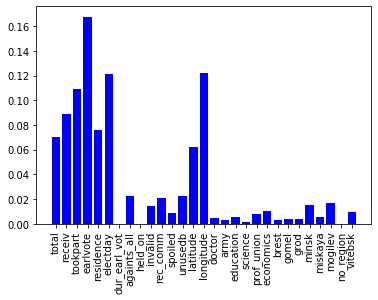

In [86]:
import numpy as np
import matplotlib.pyplot as plt 
 
courses = ['total','receiv','tookpart','earlvote','residence','electday','dur_earl_vot','againts_all','held_on','invalid','rec_comm','spoiled','unusedb','latitude','longitude','doctor','army','education','science','prof_union','economics','brest','gomel', 'grod','minsk','miskaya','mogilev','no_region','vitebsk']
values = values_imp

plt.bar(courses, values, color ='blue')

plt.xticks(rotation = 90)
plt.show()